In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
arjunbhasin2013_ccdata_path = kagglehub.dataset_download('arjunbhasin2013/ccdata')

print('Data source import complete.')


Data source import complete.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('/content/CC GENERAL.csv')

In [8]:
df_numeric = df.drop(columns=["CUST_ID"], errors='ignore')
df_numeric.fillna(df_numeric.median(), inplace=True)

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=10)
df['TempCluster'] = kmeans_temp.fit_predict(df_pca)

lda = LDA(n_components=2)
df_lda = lda.fit_transform(df_pca, df['TempCluster'])

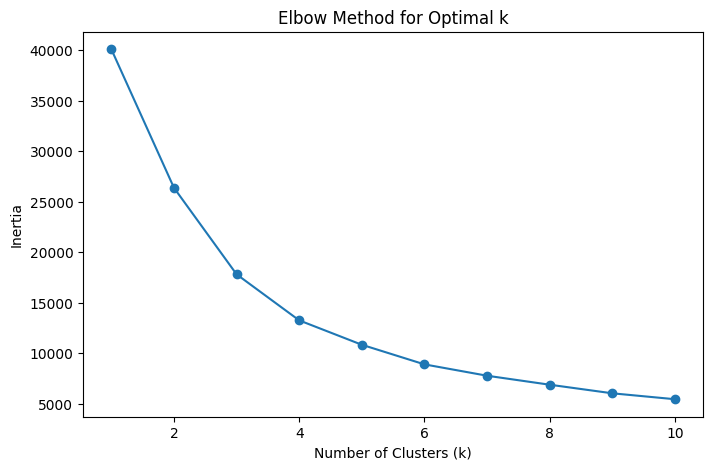

In [10]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_lda)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [11]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_lda)

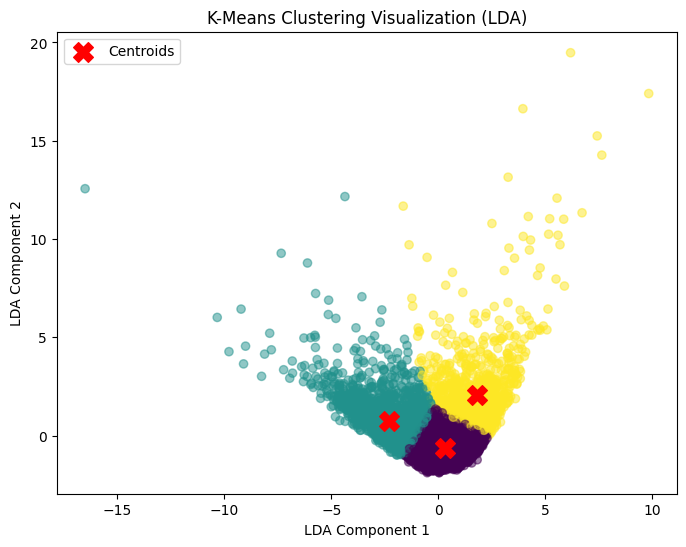

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df_lda[:, 0], df_lda[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('K-Means Clustering Visualization (LDA)')
plt.legend()
plt.show()